In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Data для тестового.xlsx')
df.head()

,Название рассылки,Название кампании,Направление,Месяц,Дата,Год,Номер недели,День недели,День недели.1,Время,...,Доставлено,Открытия,Клики,Баунсы (Все ошибки),Отписки,UTM Метка,Пользователей на сайте,Воронка продаж. Шаг 1,Воронка продаж. Шаг 2,Воронка продаж. Шаг 3
0,Название рассылки 1,Название кампании 1,Email,Октябрь,2021-10-27,2021,43,3,03-среда,19:24:00,...,741749.55,148349.910,17801.989200,39039.45,7417.4955,Метка 1,16377.830064,6336.582452,6209.850803,5154.176166
1,Название рассылки 10,Название кампании 10,Email,Ноябрь,2021-11-05,2021,45,5,05-пятница,12:02:00,...,683401.50,123012.270,11071.104300,35968.50,6834.0150,Метка 10,10296.126999,3558.341491,3095.757097,2538.520820
2,Название рассылки 100,Название кампании 100,Email,Апрель,2022-04-11,2022,15,1,01-понедельник,16:26:00,...,1141344.25,182615.080,15339.666720,60070.75,11413.4425,Метка 100,13959.096715,3369.725947,2864.267055,2262.770973
3,Название рассылки 101,Название кампании 101,Email,Апрель,2022-04-12,2022,15,2,02-вторник,16:26:00,...,1324135.65,264827.130,10328.258070,69691.35,13241.3565,Метка 101,8985.584521,5116.391826,4277.303567,3207.977675
4,Название рассылки 102,Название кампании 102,Email,Апрель,2022-04-13,2022,15,3,03-среда,16:26:00,...,1212979.95,218336.391,15720.220152,63841.05,12129.7995,Метка 102,10846.951905,2816.953410,2287.366169,1669.777303


In [3]:
print(df.dtypes)
print(df.isnull().sum())
df.describe()

Название рассылки                 object
Название кампании                 object
Направление                       object
Месяц                             object
Дата                      datetime64[ns]
Год                                int64
Номер недели                       int64
День недели                        int64
День недели.1                     object
Время                             object
Веб-версия                        object
Тема письма                       object
Сегмент                           object
Отправлено                         int64
Доставлено                       float64
Открытия                         float64
Клики                            float64
Баунсы (Все ошибки)              float64
Отписки                          float64
UTM Метка                         object
Пользователей на сайте           float64
Воронка продаж. Шаг 1            float64
Воронка продаж. Шаг 2            float64
Воронка продаж. Шаг 3            float64
dtype: object
На

,Год,Номер недели,День недели,Отправлено,Доставлено,Открытия,Клики,Баунсы (Все ошибки),Отписки,Пользователей на сайте,Воронка продаж. Шаг 1,Воронка продаж. Шаг 2,Воронка продаж. Шаг 3
count,218.000000,218.000000,218.000000,2.180000e+02,2.180000e+02,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,2021.394495,27.816514,3.440367,1.476656e+06,1.442694e+06,196476.167046,15915.060511,33962.086468,37804.902234,14014.228180,5717.036727,4967.900673,3878.608692
std,0.489867,18.294652,1.452354,5.874587e+05,5.757326e+05,91896.218927,9326.561930,19460.524725,70870.960657,8540.576860,4064.834269,3602.265091,2849.902636
min,2021.000000,1.000000,1.000000,5.100340e+05,4.998333e+05,50529.115840,1970.635518,8136.885000,1036.401240,1911.516452,579.096548,550.712692,414.285670
25%,2021.000000,10.250000,2.000000,9.304825e+05,9.124193e+05,127877.674355,9625.900031,18443.870000,5504.182906,8296.303536,2845.235740,2493.192339,1834.770428
50%,2021.000000,28.000000,4.000000,1.497056e+06,1.454843e+06,177669.441325,13619.749808,31871.485000,9192.421856,11803.081951,4662.755013,3979.560320,3163.929664
75%,2022.000000,46.000000,5.000000,1.988811e+06,1.943932e+06,256645.919805,19962.325895,42848.515000,15962.724855,17461.208240,7507.400079,6380.468800,5034.315750
max,2022.000000,52.000000,6.000000,2.492076e+06,2.441119e+06,436664.088000,47292.145286,118932.350000,303771.668200,45131.446080,23427.488348,19023.120538,15028.265225


In [4]:
#DELIVERY RATE (Процент доставки)
df['Delivery_Rate'] = (df['Доставлено'] / df['Отправлено']) * 100

#OPEN RATE (Процент открытий)
df['Open_Rate'] = (df['Открытия'] / df['Доставлено']) * 100

#CLICK TO OPEN RATE (Процент кликов от открытий)
df['Click_to_Open_Rate'] = (df['Клики'] / df['Открытия']) * 100

#UNSUBSCRIBE RATE (Процент отписок)
df['Unsubscribe_Rate'] = (df['Отписки'] / df['Доставлено']) * 100

df[['Название рассылки', 'Delivery_Rate', 'Open_Rate', 'Click_to_Open_Rate', 'Unsubscribe_Rate']].head()

,Название рассылки,Delivery_Rate,Open_Rate,Click_to_Open_Rate,Unsubscribe_Rate
0,Название рассылки 1,95.0,20.0,12.0,1.0
1,Название рассылки 10,95.0,18.0,9.0,1.0
2,Название рассылки 100,95.0,16.0,8.4,1.0
3,Название рассылки 101,95.0,20.0,3.9,1.0
4,Название рассылки 102,95.0,18.0,7.2,1.0


In [6]:
df[['Delivery_Rate', 'Open_Rate', 'Click_to_Open_Rate', 'Unsubscribe_Rate']].describe()

,Delivery_Rate,Open_Rate,Click_to_Open_Rate,Unsubscribe_Rate
count,218.000000,218.000000,218.000000,218.000000
mean,97.646789,13.763761,8.123394,2.470138
std,1.081480,3.391909,2.630967,4.173631
min,95.000000,9.200000,3.900000,0.150000
25%,98.000000,11.050000,7.200000,0.570000
50%,98.000000,13.990000,8.400000,0.630000
75%,98.500000,17.430000,9.000000,0.900000
max,98.500000,20.000000,12.000000,13.000000


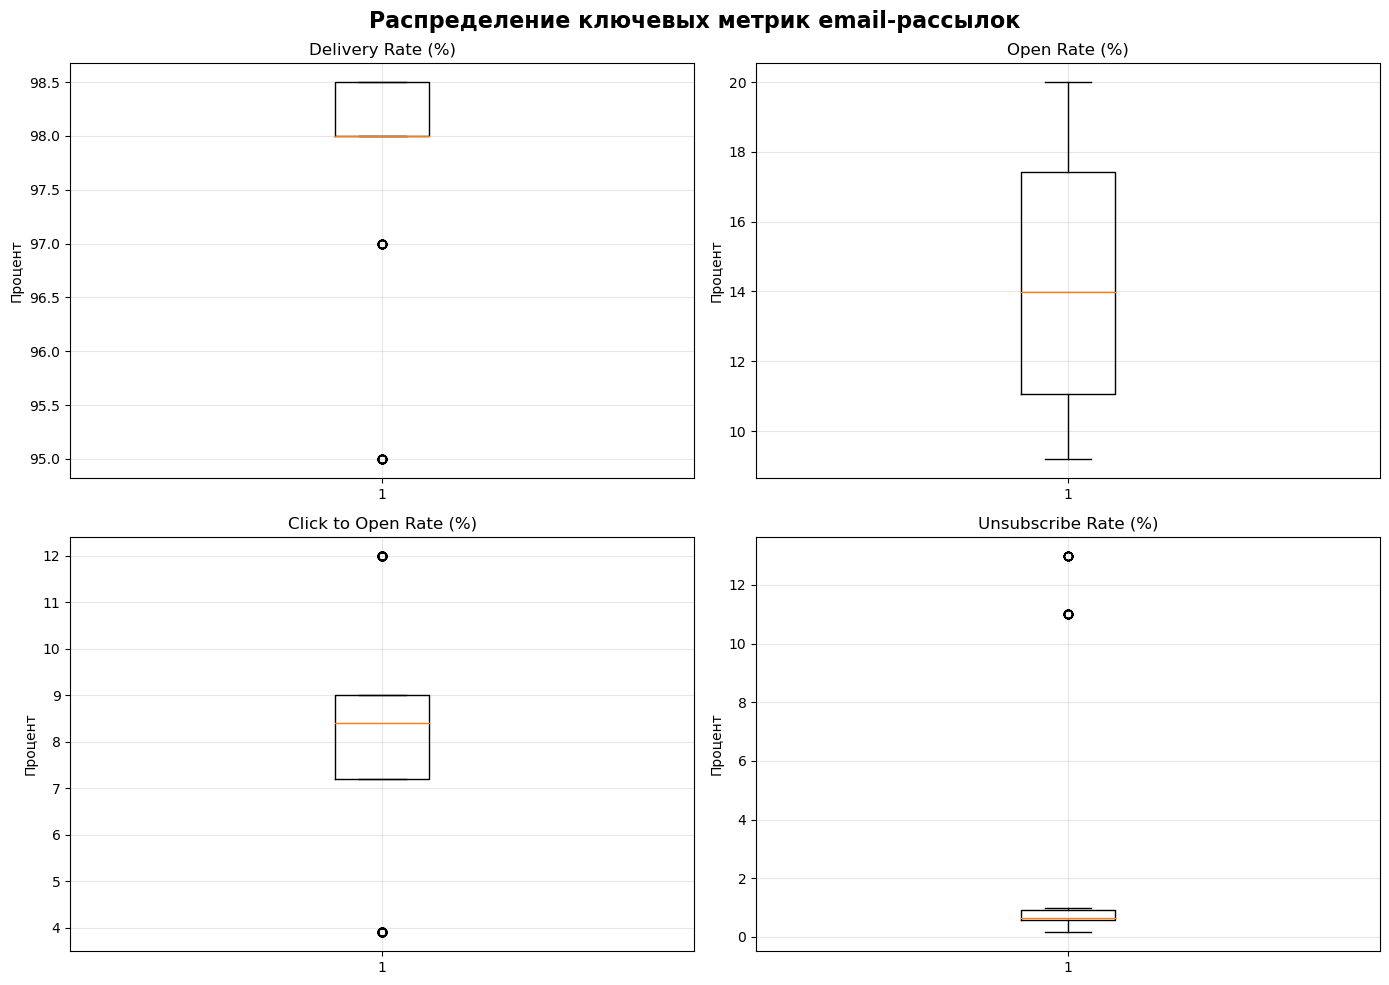

In [7]:
#Распределение метрик
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Распределение ключевых метрик email-рассылок', fontsize = 16, fontweight = 'bold')

#DR
axes[0, 0].boxplot(df['Delivery_Rate'].dropna())
axes[0, 0].set_title('Delivery Rate (%)')
axes[0, 0].set_ylabel('Процент')
axes[0, 0].grid(True, alpha = 0.3)

#OR
axes[0, 1].boxplot(df['Open_Rate'].dropna())
axes[0, 1].set_title('Open Rate (%)')
axes[0, 1].set_ylabel('Процент')
axes[0, 1].grid(True, alpha = 0.3)

#CTOR
axes[1, 0].boxplot(df['Click_to_Open_Rate'].dropna())
axes[1, 0].set_title('Click to Open Rate (%)')
axes[1, 0].set_ylabel('Процент')
axes[1, 0].grid(True, alpha = 0.3)

#UR
axes[1, 1].boxplot(df['Unsubscribe_Rate'].dropna())
axes[1, 1].set_title('Unsubscribe Rate (%)')
axes[1, 1].set_ylabel('Процент')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

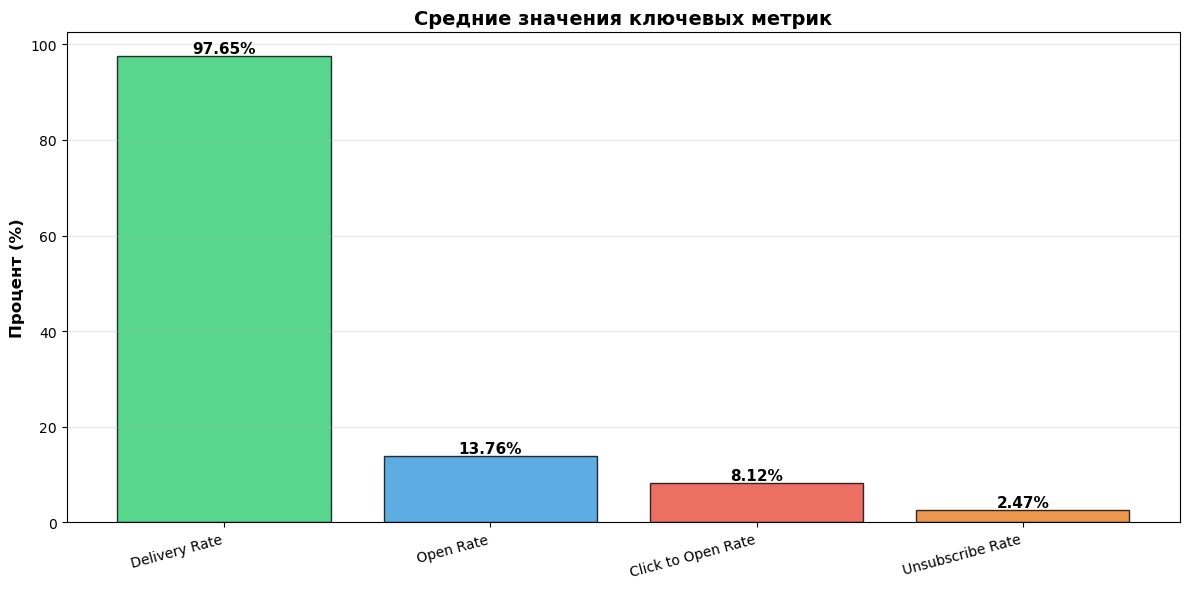

In [8]:
#Столбчатая диаграмма средних значений
fig, ax = plt.subplots(figsize=(12, 6))

metrics_names = ['Delivery Rate', 'Open Rate', 'Click to Open Rate', 'Unsubscribe Rate']
metrics_values = [
    df['Delivery_Rate'].mean(),
    df['Open_Rate'].mean(),
    df['Click_to_Open_Rate'].mean(),
    df['Unsubscribe_Rate'].mean()
]

colors = ['#2ecc71', '#3498db', '#e74c3c', '#e67e22']
bars = ax.bar(metrics_names, metrics_values, color = colors, alpha = 0.8, edgecolor = 'black')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2., height,
            f'{height:.2f}%',
            ha = 'center', va = 'bottom', fontweight = 'bold', fontsize = 11)

ax.set_ylabel('Процент (%)', fontsize = 12, fontweight = 'bold')
ax.set_title('Средние значения ключевых метрик', fontsize = 14, fontweight = 'bold')
ax.grid(True, alpha = 0.3, axis = 'y')
plt.xticks(rotation = 15, ha = 'right')
plt.tight_layout()
plt.show()

In [11]:
segment_stats = df.groupby('Сегмент ').agg({
    'Delivery_Rate': 'mean',
    'Open_Rate': 'mean',
    'Click_to_Open_Rate': 'mean',
    'Unsubscribe_Rate': 'mean',
    'Отправлено': 'sum'
}).round(2)

segment_stats.columns = ['Delivery Rate (%)', 'Open Rate (%)', 'Click to Open Rate (%)', 
                         'Unsubscribe Rate (%)', 'Всего отправлено']

print(segment_stats)

           Delivery Rate (%)  Open Rate (%)  Click to Open Rate (%)  \
Сегмент                                                               
Сегмент 1              97.58          13.77                    8.11   
Сегмент 2              97.68          13.99                    8.11   
Сегмент 3              97.68          13.49                    8.15   

           Unsubscribe Rate (%)  Всего отправлено  
Сегмент                                            
Сегмент 1                  2.54         104030332  
Сегмент 2                  2.53         113229527  
Сегмент 3                  2.32         104651078  


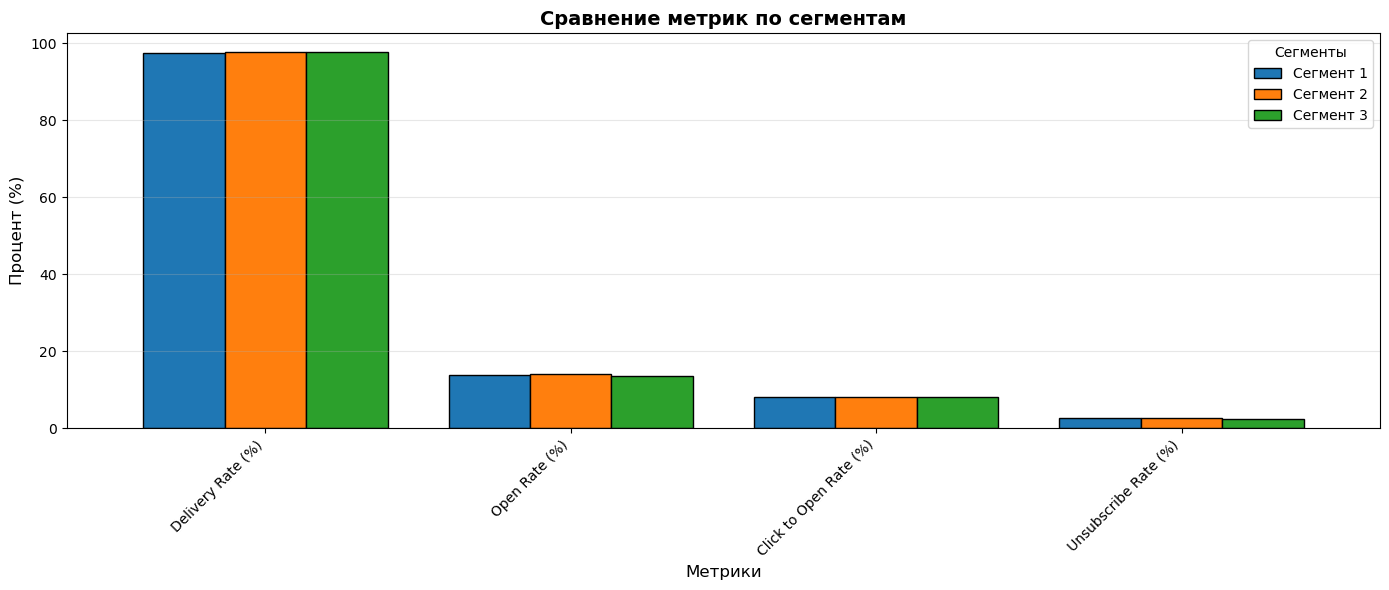

In [12]:
#Визуализация по сегментам
segment_stats_plot = segment_stats[['Delivery Rate (%)', 'Open Rate (%)', 
                                      'Click to Open Rate (%)', 'Unsubscribe Rate (%)']].T

fig, ax = plt.subplots(figsize = (14, 6))
segment_stats_plot.plot(kind = 'bar', ax = ax, width = 0.8, edgecolor = 'black')
ax.set_title('Сравнение метрик по сегментам', fontsize = 14, fontweight = 'bold')
ax.set_ylabel('Процент (%)', fontsize = 12)
ax.set_xlabel('Метрики', fontsize = 12)
ax.legend(title = 'Сегменты', fontsize = 10)
ax.grid(True, alpha = 0.3, axis = 'y')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

In [19]:
theme_analysis = df.groupby('Тема письма ').agg({
    'Delivery_Rate': 'mean',
    'Open_Rate': 'mean',
    'Click_to_Open_Rate': 'mean',
    'Unsubscribe_Rate': 'mean',
    'Отправлено': 'sum',
    'Открытия': 'sum',
    'Клики': 'sum'
}).round(2)

theme_analysis.columns = [
    'Delivery Rate (%)', 
    'Open Rate (%)', 
    'CTOR (%)',
    'Unsubscribe Rate (%)',
    'Всего отправлено',
    'Всего открытий',
    'Всего кликов'
]

theme_analysis['Комплексная оценка'] = (
    theme_analysis['Open Rate (%)'] * 0.4 +
    theme_analysis['CTOR (%)'] * 0.4 -
    theme_analysis['Unsubscribe Rate (%)'] * 0.2
).round(2)

#Сортируем по комплексной оценке
theme_analysis_sorted = theme_analysis.sort_values('Комплексная оценка', ascending = False)

print(theme_analysis_sorted.head(10).to_string())

                 Delivery Rate (%)  Open Rate (%)  CTOR (%)  Unsubscribe Rate (%)  Всего отправлено  Всего открытий  Всего кликов  Комплексная оценка
Тема письма                                                                                                                                          
Тема письма 1                 95.0          20.00      12.0                  1.00            780789       148349.91      17801.99               12.60
Тема письма 149               98.0          18.00      12.0                  0.59            624983       110247.00      13229.64               11.88
Тема письма 158               97.0          18.00      12.0                  0.59           1710675       298683.86      35842.06               11.88
Тема письма 207               98.5          17.43      12.0                  0.28           2289758       393118.25      47174.19               11.72
Тема письма 194               98.5          17.43      12.0                  0.34           1639899 

In [20]:
#Находим лучшую тему
best_theme = theme_analysis_sorted.index[0]
best_theme_stats = theme_analysis_sorted.iloc[0]

print(f"Тема: {best_theme}")
print(f"Delivery Rate: {best_theme_stats['Delivery Rate (%)']}%")
print(f"Open Rate: {best_theme_stats['Open Rate (%)']}%")
print(f"CTOR: {best_theme_stats['CTOR (%)']}%")
print(f"Unsubscribe Rate: {best_theme_stats['Unsubscribe Rate (%)']}%")
print(f"Комплексная оценка: {best_theme_stats['Комплексная оценка']}")
print(f"Всего отправлено: {int(best_theme_stats['Всего отправлено']):,}")
print(f"Всего открытий: {int(best_theme_stats['Всего открытий']):,}")
print(f"Всего кликов: {int(best_theme_stats['Всего кликов']):,}")

Тема: Тема письма 1
Delivery Rate: 95.0%
Open Rate: 20.0%
CTOR: 12.0%
Unsubscribe Rate: 1.0%
Комплексная оценка: 12.6
Всего отправлено: 780,789
Всего открытий: 148,349
Всего кликов: 17,801


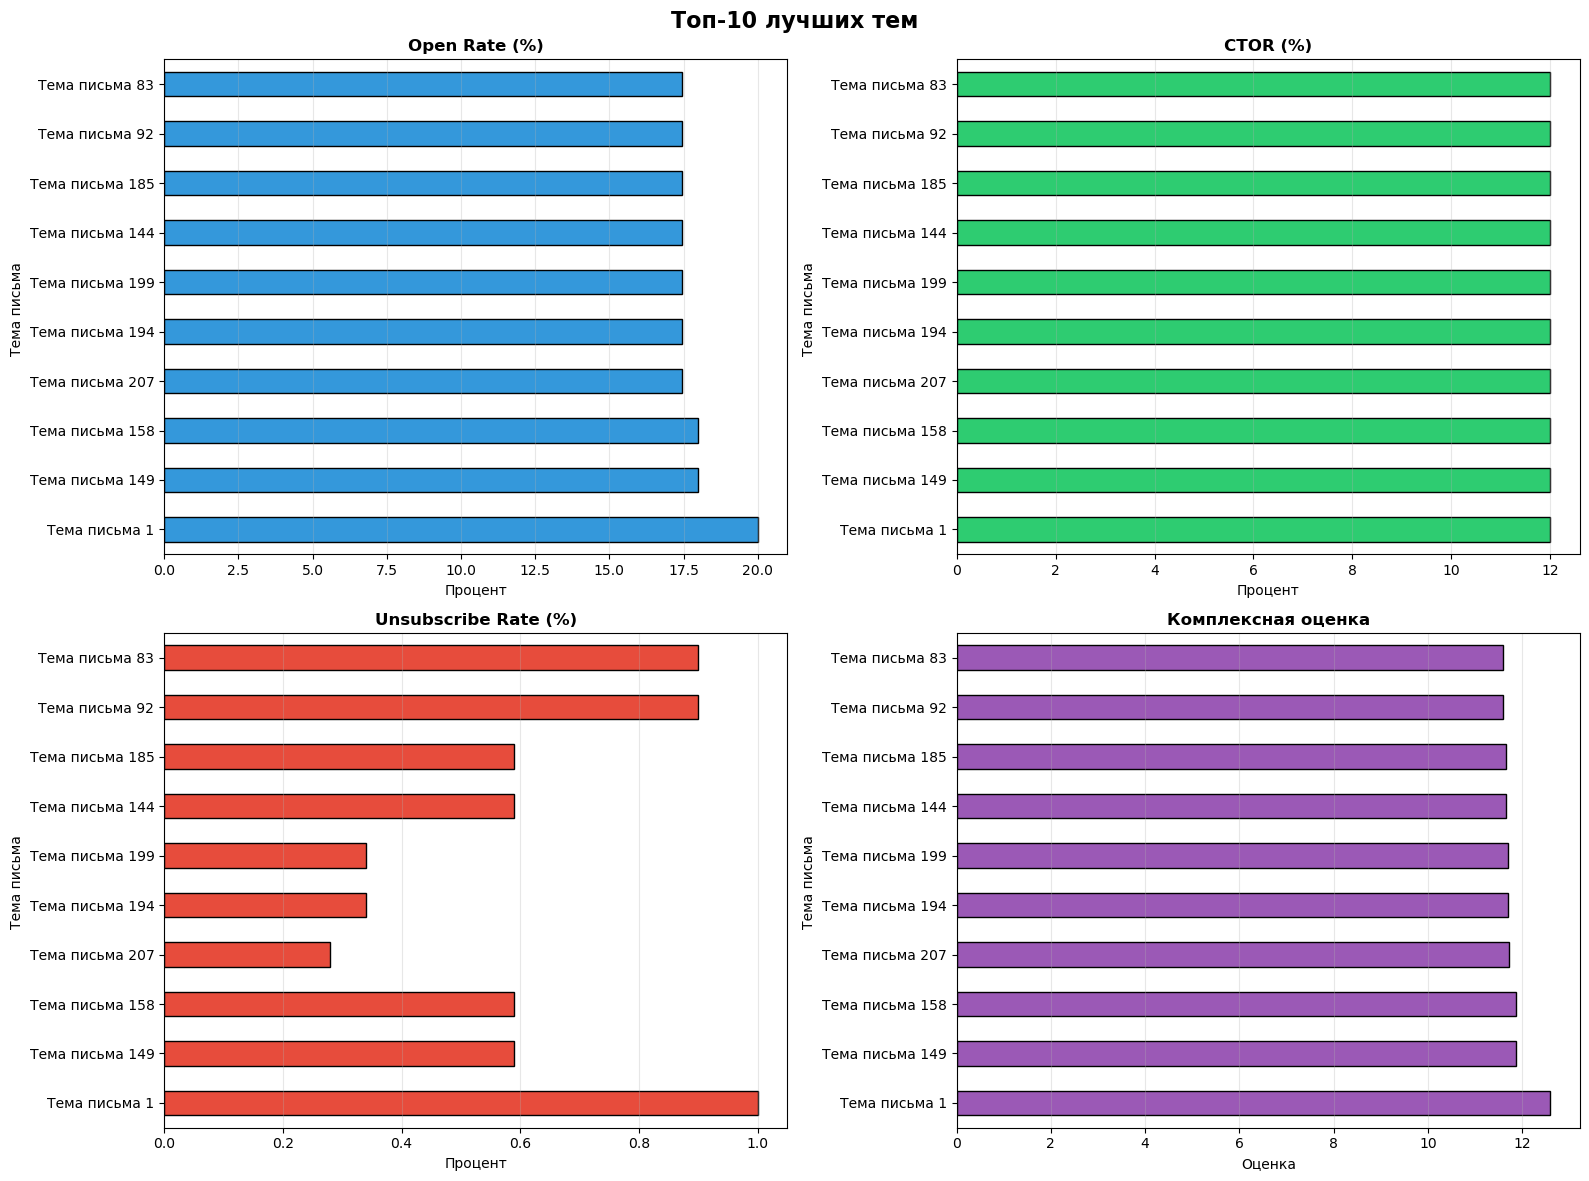

In [21]:
#Топ-10 лучших тем
top_10_themes = theme_analysis_sorted.head(10)

fig, axes = plt.subplots(2, 2, figsize = (16, 12))
fig.suptitle('Топ-10 лучших тем', fontsize = 16, fontweight = 'bold')

top_10_themes['Open Rate (%)'].plot(kind = 'barh', ax = axes[0, 0], color = '#3498db', edgecolor = 'black')
axes[0, 0].set_title('Open Rate (%)', fontweight='bold')
axes[0, 0].set_xlabel('Процент')
axes[0, 0].grid(True, alpha=0.3, axis='x')

top_10_themes['CTOR (%)'].plot(kind = 'barh', ax = axes[0, 1], color = '#2ecc71', edgecolor = 'black')
axes[0, 1].set_title('CTOR (%)', fontweight = 'bold')
axes[0, 1].set_xlabel('Процент')
axes[0, 1].grid(True, alpha = 0.3, axis = 'x')

top_10_themes['Unsubscribe Rate (%)'].plot(kind = 'barh', ax = axes[1, 0], color = '#e74c3c', edgecolor = 'black')
axes[1, 0].set_title('Unsubscribe Rate (%)', fontweight = 'bold')
axes[1, 0].set_xlabel('Процент')
axes[1, 0].grid(True, alpha = 0.3, axis = 'x')

top_10_themes['Комплексная оценка'].plot(kind = 'barh', ax = axes[1, 1], color = '#9b59b6', edgecolor = 'black')
axes[1, 1].set_title('Комплексная оценка', fontweight = 'bold')
axes[1, 1].set_xlabel('Оценка')
axes[1, 1].grid(True, alpha = 0.3, axis = 'x')

plt.tight_layout()
plt.show()